- Passo 1: Importar e analisar a base de dados

In [29]:
import pandas as pd

tabela = pd.read_excel("Vendas.xlsx") # Armazenando a base de dados na variável 'tabela'. Como estamos usando um excel, usamos o parâmetro read_excel
display(tabela) # Exibindo a tabela de modo estilizado (display)

,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,2019-12-01,Iguatemi Campinas,Bermuda Estampa,1,169,169
1,2019-12-01,Iguatemi Esplanada,Bermuda Xadrez,1,155,155
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
3,2019-12-01,Iguatemi Campinas,Bermuda Listrado,3,163,489
4,2019-12-01,Iguatemi Campinas,Bermuda Linho,3,195,585
5,2019-12-03,Iguatemi Campinas,Bermuda Xadrez,1,155,155
6,2019-12-03,Bourbon Shopping SP,Bermuda Listrado,1,163,163
7,2019-12-03,Bourbon Shopping SP,Bermuda Xadrez,3,155,465
8,2019-12-03,Bourbon Shopping SP,Bermuda Estampa,1,169,169
9,2019-12-04,Center Shopping Uberlândia,Bermuda Xadrez,4,155,620


- Passo 2: Fazer um panorama geral da base de dados para entender primeiramente como está o faturamento da empresa

-> Para saber o que deve ser feito, primeiro precisamos saber qual a situação atual da empresa

In [30]:
faturamento_total = tabela["Valor Final"].sum() # Pegamos somente a coluna que interessa para saber o faturamento total
print(faturamento_total)

55895


## Após verificar o faturamento total, podemos analisar se existe alguma diferença de faturamento por loja

- Será que existe alguma loja vendendo mais do que outra?
- Será que algum produto está sobressaindo nas vendas e outros estão abandonados?

- Passo 3: calcular o faturamento por loja

In [31]:
# Vamos calcular o faturamento por loja

faturamento_por_loja = tabela[["ID Loja", "Valor Final"]].groupby("ID Loja").sum() # Seleciona o ID Loja para saber quais lojas temos e o Valor Final para vermos o faturamento de cada loja agrupando no final o ID Loja
display(faturamento_por_loja)

,Valor Final
ID Loja,
Bourbon Shopping SP,4386
Center Shopping Uberlândia,2994
Iguatemi Campinas,41720
Iguatemi Esplanada,2473
Norte Shopping,4322


## Agora Temos a informação de que existe uma diferença muito grande do faturamento
# Vamos pegar primeiro os grandes números (geralmente são as grandes oportunidades)

- Por que a loja Iguatemi Campinas faturou entre 10 e 20 vezes mais que as outras lojas?

- Será um produto?

-> Precisamos saber o motivo da loja Iguatemi Campinas estar vendendo tanto e replicar isso para as outras lojas. 

- Passo 4: calcular o faturamento por produto

In [32]:
# Vamos calcular o faturamento por produto

faturamento_por_produto = tabela[["ID Loja","Produto", "Valor Final"]].groupby(["ID Loja", "Produto"]).sum() # Vamos selecionar a loja, o produto e o valor para entendermos qual produto vende mais
display(faturamento_por_produto)

Valor Final
ID Loja                    Produto                      
Bourbon Shopping SP        Bermuda                   750
                           Bermuda Estampa          1183
                           Bermuda Linho             195
                           Bermuda Listrado         1793
                           Bermuda Xadrez            465
Center Shopping Uberlândia Bermuda Estampa           338
                           Bermuda Linho             780
                           Bermuda Listrado          326
                           Bermuda Xadrez           1550
Iguatemi Campinas          Bermuda                  1200
                           Bermuda Estampa           845
                           Bermuda Linho            1170
                           Bermuda Liso            36581
                           Bermuda Listrado         1304
                           Bermuda Xadrez            620
Iguatemi Esplanada         Bermuda                   150
                           Bermuda Estampa           338
                           Bermuda Linho            1365
                           Bermuda Xadrez            620
Norte Shopping             Bermuda                  1350
                           Bermuda Estampa           845
                           Bermuda Linho             390
                           Bermuda Listrado          652
                           Bermuda Xadrez           1085

## Iguatemi Campinas

Bermuda	- 1200
Bermuda Estampa - 845
Bermuda Linho - 1170
**Bermuda Liso - 36581**
Bermuda Listrado - 1304
Bermuda Xadrez - 620

## Com essa informação, vemos que o faz a diferença da loja Iguatemi Campinas para as demais lojas é a **Bermuda Liso** que não existe nas outras lojas.

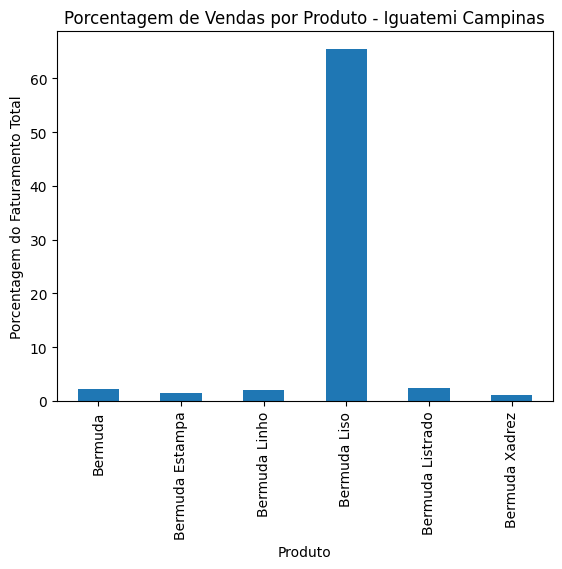

In [33]:
import matplotlib.pyplot as plt

# Filtrar o DataFrame para 'Iguatemi Campinas'
iguatemi_campinas_vendas = faturamento_por_produto.loc['Iguatemi Campinas']

# Agrupar por produto e fazer o somatório das vendas
vendas_produto = iguatemi_campinas_vendas.groupby(level=0)['Valor Final'].sum()

# Calcular a porcentagem de vendas de cada produto
porcentagem_vendas = (vendas_produto / faturamento_total) * 100

# Plotando
porcentagem_vendas.plot(kind='bar')
plt.title('Porcentagem de Vendas por Produto - Iguatemi Campinas')
plt.xlabel('Produto')
plt.ylabel('Porcentagem do Faturamento Total')
plt.show()

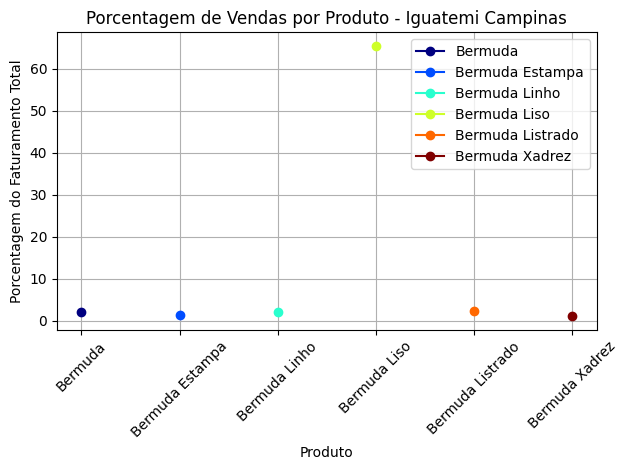

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar o DataFrame para 'Iguatemi Campinas'
iguatemi_campinas_vendas = faturamento_por_produto.loc['Iguatemi Campinas']

# Agrupar por produto e fazer o somatório das vendas
vendas_produto = iguatemi_campinas_vendas.groupby(level=0)['Valor Final'].sum()

# Calcular a porcentagem de vendas de cada produto
porcentagem_vendas = (vendas_produto / faturamento_total) * 100

# Preparar os dados para plotagem
produtos = porcentagem_vendas.index
valores = porcentagem_vendas.values

# Gerar cores distintas para cada produto
cores = plt.cm.jet(np.linspace(0, 1, len(produtos)))

# Plotando
for produto, valor, cor in zip(produtos, valores, cores):
    plt.plot(produto, valor, label=produto, color=cor, marker='o', linestyle='-')

plt.title('Porcentagem de Vendas por Produto - Iguatemi Campinas')
plt.xlabel('Produto')
plt.ylabel('Porcentagem do Faturamento Total')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotação dos nomes dos produtos para melhor visualização
plt.tight_layout()  
plt.show()

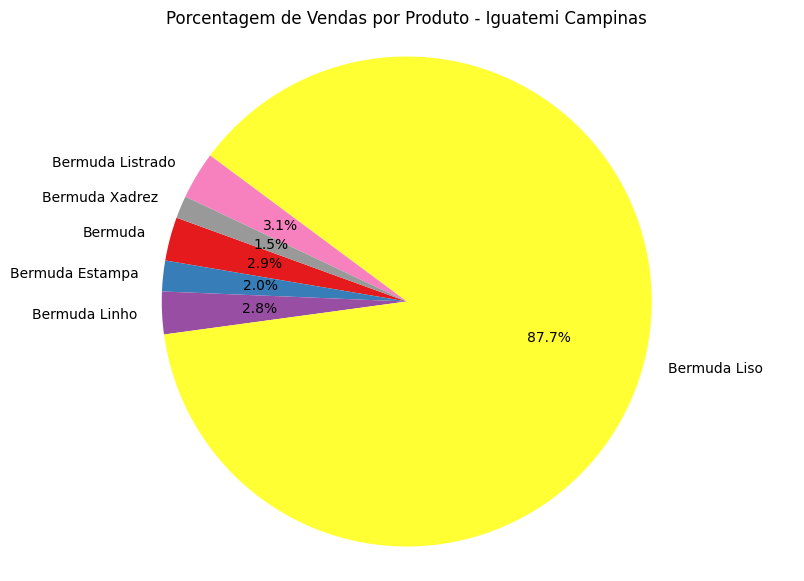

In [35]:
import matplotlib.pyplot as plt

# Calcular a porcentagem de vendas de cada produto
porcentagem_vendas = (vendas_produto / faturamento_total) * 100

# Preparar os dados para plotagem
produtos = porcentagem_vendas.index
valores = porcentagem_vendas.values

# Gerar cores claras para cada produto usando o mapa de cores
cores = plt.cm.Set1(np.linspace(0, 1, len(produtos)))

# Plotando o gráfico de pizza
plt.figure(figsize=(10, 7))  # Ajusta o tamanho da figura
plt.pie(valores, labels=produtos, colors=cores, autopct='%1.1f%%', startangle=160)
plt.title('Porcentagem de Vendas por Produto - Iguatemi Campinas')
plt.axis('equal')  # Garante que o pie chart seja circular.

plt.show()

# Conclusão

-> O faturamento ABSURDO da loja Iguatemi Campinas se dá pela existência da **Bermuda Liso**, que representa 87.7% das vendas. Podemos fazer um contato com a loja Iguatemi Campinas para entender mais a fundo as vendas dessa bermuda, porém a primeira medida é deixar essa bermuda disponível para as outras lojas venderem também. 